# Домашнее задание 1

Это домашнее задание по материалам первого семинаров. Дедлайн по отправке - 23:55 10 февраля. 

Домашнее задание выполняется в этом же Jupyter Notebook'e и присылается мне на почту: __beznosikov.an@phystech.edu__.

Решение каждой задачи необходимо поместить после её условия.

Файл должен называться: Фамилия_Имя_Optimization_HW_1

При полном запуске Вашего решения (Kernel -> Restart & Run All) все ячейки должны выполняться без ошибок. 

## Задача 1

Рассмотрим следуюущую задачу оптимизации:
\begin{equation}
\min_{x \in \mathbb{R}^d} \left[f(x) := \tfrac{1}{2} x^T A x - b^T x\right],
\end{equation}
где $A \in \mathbb{R}^{d \times d}$, $b \in \mathbb{R}^d$.

__(а)__ Является ли данная задача всегда выпуклой/сильной выпуклой? При каких условиях?

#### Решение:
Исследуем по критериям выпуклости и сильной выпуклости: для  начала найдем градиент и гессиан $f$. 
$\nabla f = \frac{1}{2}(A+A^T)x-b, \nabla ^2f = \frac{1}{2}(A+A^T)\\$ 
$f - \text{вып.} \Leftrightarrow \nabla f \geq 0$, $f - \text{сил. вып.} \Leftrightarrow \nabla ^2f \geq \mu I$.
Таким образом, для выпуклости необходимо положительная полуопределённость матрицы $A$, а для сильной выпуклости - $\frac{1}{2}(A+A^T) \geq \mu$. То есть помимо положительной полуопределенности должна быть положительная определённость матрицы $A-\mu I$

__(б)__ Оцените для этой функции константу сильной выпуклости и константу Липшица градиента.

## Решение: 
#### a) Оценим константу Липшица: $||\nabla f(x) - \nabla f(x_0)|| \leq L ||x-x_0|| \\$ 
$||\frac{1}{2}(A+A^T)(x-x_0)|| \leq L ||x-x_0||$

Заметим, что $||\frac{1}{2}(A+A^T)(x-x_0)|| \leq ||\frac{1}{2}(A+A^T)|| \cdot ||x-x_0|| $

Таким образом, $L = ||\frac{1}{2}(A+A^T)|| \\ $
Кроме того, $L - $ минимальное собственное значение матрицы А
#### a) Оценим константу сильной выпуклости: 
$\frac{1}{2}(A+A^T) \geq \mu \\ $
$\mu - $ минимальное собственное значение матрицы А

## Задача 2

Продолжаем работать с задачей оптимизации из предыдущей задачи.

__(а)__ Придумайте (или найдите) способ генерации матрицы $А$, так чтобы $f$ была сильно выпуклой, а также можно было задавать и менять $d, \mu, L$.

## Решение: 
Будем брать матрицу с собственными значениями $\mu, L$ и остальными, равномерно распределёнными между ними. Это делается с помощью генерации соответствующей диагональной матрицы, где собственные значения есть непосредственно элементы на диагонали. Затем домножим эту матрицу слева и справа на ортогональную (также рандомно сгенерированную) и транспонированную ортогональную. Проверим условие сильной выпуклости. Тогда получится положительно определенная симметричная матрица, соответствующая сильно выпуклому случаю.

In [1]:
import numpy as np
from math import log, exp, ceil, sqrt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.linear_model import LinearRegression
import time 
from scipy.stats import special_ortho_group  


In [2]:
d = 10 # размерность матрицы
mu = 1 # константа сильной выпуклости
L = 100 # константа Липшица
E = np.eye(d) # единичная матрица

def generating_matrix(d,mu,L): #генерация положительно-определенной матрицы, так чтобы A-mu*I >= 0 
    i = 0
    while i == 0:
        diagonal_entries = np.random.uniform(mu, L,d)
        diagonal_entries[0] = mu
        diagonal_entries[1] = L
        D = np.diag(diagonal_entries)
        m = special_ortho_group.rvs(d)
        A = (np.linalg.inv(m).dot(D)).dot(m)
        np.set_printoptions(suppress=True)
        if (is_pos_def(A-mu*E)):
            i += 1
    return A

def is_pos_def(x): #проверка положительной определённости
    return np.all(np.linalg.eigvals(x) > 0)


def is_strongly_pos_def(x): #проверка положительной определённости
    return np.all(np.linalg.eigvals(x) >= 0)

A = generating_matrix(d,mu,L)
print(A)

[[ 40.75319968  -5.75319905  -6.7988549    4.96255181  -6.45814932
   -6.21692972 -21.96964403  -7.73707168  10.08917843  -0.08014683]
 [ -5.75319905  72.48188425  12.88096457  -0.66714247   6.87229772
    6.72893649   9.01112864   1.26844732   7.69384989   2.32405   ]
 [ -6.7988549   12.88096457  53.96919801  -1.42149343  14.32061326
    1.96245475   0.83581532   2.5500381    8.62438518   2.5466597 ]
 [  4.96255181  -0.66714247  -1.42149343  46.77397586  -7.73288291
   21.63157722   8.73819069   3.49991878  -9.80053804  23.6457552 ]
 [ -6.45814932   6.87229772  14.32061326  -7.73288291  50.81639352
    3.8259374   -4.8646778    1.52781626   1.38296083  -0.81318159]
 [ -6.21692972   6.72893649   1.96245475  21.63157722   3.8259374
   50.63700756  21.52327472 -18.94569783   5.57558578  -3.03950494]
 [-21.96964403   9.01112864   0.83581532   8.73819069  -4.8646778
   21.52327472  45.52073193  10.78009097  16.37810125  -7.02104826]
 [ -7.73707168   1.26844732   2.5500381    3.49991878   1

__(б)__ Реализуйте метод градиетного спуска:
\begin{equation}
x_{k+1} = x_k - \gamma_k \nabla f(x_k),
\end{equation}
для квадратичной функции с матрицей, которую сгенерировали выше и произвольным вектором $b$ (лучше ненулевым). Желательно, уже сейчас и метод, и подсчет градиента реализовывать, как отдельные функции, при этом чтобы метод принимал саму целевую функцию (или ее градиент), как параметр. В дальнейшем будет легче менять целевую функцию в задаче минимизации и тестировать разные методы. 

In [3]:
#A = generating_matrix(d,mu,L)
#print ('random positive semi-define matrix is', A)
b = np.random.uniform(0, 10, d)

def gradient(x):
    return ((A + A.transpose()).dot(x/2) - b)
start = np.ones(d)

def gradient_descent(start, learn_rate, n_iter, tolerance):
    vector = start
    for _ in range(n_iter):
        diff = -learn_rate * gradient(vector)
        #if np.all((vector-x_0).dot(vector-x_0) <= tolerance):
        #    break
        vector = vector + diff
    #print((vector-x_0).dot(vector-x_0))
    return vector
print('Проверим для начальных векторов из единиц и нулей:\n')
print('Answer for ones is : ', gradient_descent(start, 0.01,1000000,1e-6))
start = np.zeros(d)
print('Answer for zeros is : ', gradient_descent(start, 0.01,1000000,1e-6))

Проверим для начальных векторов из единиц и нулей:

Answer for ones is :  [ 1.98594418 -0.12848381  0.31362522 -2.97689458 -0.16420255  1.96492686
  1.19671082  1.62820665 -1.14997894  2.62355   ]
Answer for zeros is :  [ 1.98594418 -0.12848381  0.31362522 -2.97689458 -0.16420255  1.96492686
  1.19671082  1.62820665 -1.14997894  2.62355   ]


__(в)__ Для задачи с $d = 10$, $\mu = 1$ и $L = 100$ найдите точное решение $x^*$, например, с помощью пакетов линейной алгебры (есть встроенный в numpy). Запустите градиентный спуск на $10^4$ итераций с шагом $\gamma_k = \tfrac{1}{L}$ и произвольной начальной точкой $x_0$ (если $b$ ненулевой, то можно взять нулевой $x_0$). Проверьте сходится ли он. В качестве критериев сходимости используйте $\| x_k - x^*\|^2$.

In [4]:
x_0 = np.linalg.solve(1/2*(A+A.T),b)
print('Точное решение - ', x_0)
x = gradient_descent(start, 1/L,10000,1e-7)
epsilon = (x_0 - x).dot(x_0 - x)
print('Используем 10000 итераций: Тогда норма отклонения в квадрате равна:', epsilon)
print('Answer for ones (10 thousand iterations) is : ', gradient_descent(start, 1/L,10000,1e-7))
#print('Используем 1000000 итераций: Тогда данная норма в квадрате равна:')
#print('Answer for ones (1 million iterations) is : ', gradient_descent2(start, 0.01,1000000,1e-7))

Точное решение -  [ 1.98594418 -0.12848381  0.31362522 -2.97689458 -0.16420255  1.96492686
  1.19671082  1.62820665 -1.14997894  2.62355   ]
Используем 10000 итераций: Тогда норма отклонения в квадрате равна: 1.9482630280223502e-27
Answer for ones (10 thousand iterations) is :  [ 1.98594418 -0.12848381  0.31362522 -2.97689458 -0.16420255  1.96492686
  1.19671082  1.62820665 -1.14997894  2.62355   ]


#### Таким образом, 
метод сходится, норма отклонения мала

__(г)__ Постройте график сходимости: по оси $x$ отложите номер итерации, по $y$ значения критерия на этой итерации. Поиграйтесь с осями, например, поставьте по $y$ логарифмический масштаб. Не забудьте подписать оси. Сделайте вывод о характере сходимости.

In [5]:
values_x = []
values_y = []
def gradient_descent2(start, learn_rate, n_iter, tolerance):
    values_x = []
    values_y = []
    vector = start
    for i in range(n_iter):
        diff = -learn_rate * gradient(vector)
        #if np.all((vector-x_0).dot(vector-x_0) <= tolerance):
        #    break
        vector = vector + diff
        if (i % 100 == 0):
            values_y.append(float((vector-x_0).dot(vector-x_0)))
            values_x.append(i)
    return vector, values_x, values_y
vector, values_x, values_y = gradient_descent2(start, 1/L,10001,1e-7)



/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/3637040323.py:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


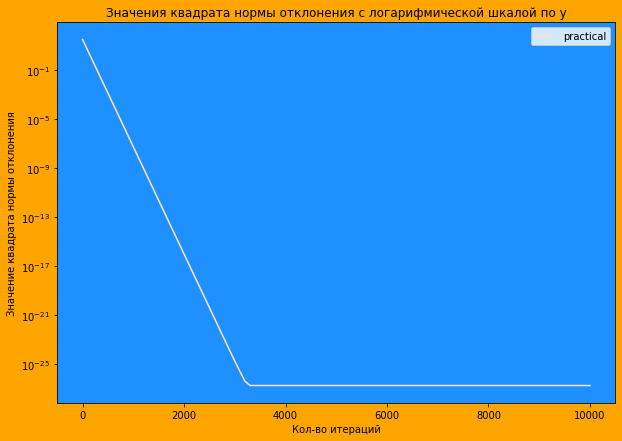

In [6]:
import matplotlib.pyplot as plt
from matplotlib import ticker

plt.figure(figsize=(10,7), facecolor = "orange") 
plt.plot(values_x, values_y,color = 'bisque')
ax = plt.axes()
ax.set_facecolor("dodgerblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
plt.legend(['practical'])
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("Кол-во итераций")
plt.ylabel("Значение квадрата нормы отклонения")
plt.title('Значения квадрата нормы отклонения с логарифмической шкалой по y')
plt.show()



#### Вывод: 
Из графиков видно, что достаточно даже меньшего числа итерация для сходимости нашего метода

__(д)__ Добавьте на график теоретическую сходимость, полученную на семинаре. Добавьте легенду, чтобы можно было отличить, какой график за что отвечает. Сделайте вывод.

In [7]:
x = []
y = []
def gradient_descent22(start, learn_rate, n_iter, tolerance):
    x = []
    y = []
    vector = start
    for i in range(n_iter):
        diff = -learn_rate * gradient(vector)
        #if np.all((vector-x_0).dot(vector-x_0) <= tolerance):
        #    break
        vector = vector + diff
        if (i % 100 == 0):
            y.append((1-mu/L)*float((vector-x_0).dot(vector-x_0)))
            x.append(i+1)
    return vector, x, y
vector, x, y = gradient_descent22(start, 1/L,10001,1e-7)



/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/213215401.py:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


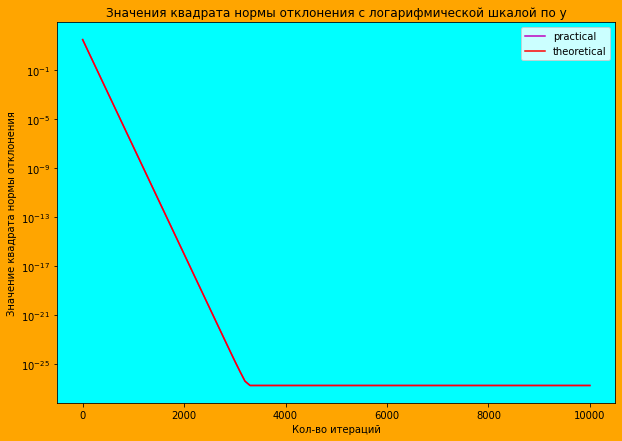

In [8]:
from math import log
#k = L/mu*log(x_0.dot(x_0.T)/(epsilon**2))
x_02 = float(x_0.dot(x_0.T))
#print('k = ', k)
#print('x_0 = ', x_0)
#print('x_02 = ', x_02)
#y = float(x_02)*(1-x/k)
#y = float(x_02)+ (1 - epsilon)*(-x/k)*float(x_02)
#print(y)
plt.figure(figsize=(10,7), facecolor = "orange") 
#plt.plot(values_x, values_y ,color = 'red')
#plt.plot(x,y ,color = 'blue')

        
        
line2, = plt.plot(values_x, values_y, 'm')
line3, = plt.plot(x, y, 'r')
plt.legend((line2, line3), ['practical', 'theoretical'])
ax = plt.axes()
ax.set_facecolor("cyan")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.legend(['practical'])
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("Кол-во итераций")
plt.ylabel("Значение квадрата нормы отклонения")
plt.title('Значения квадрата нормы отклонения с логарифмической шкалой по y')
plt.show()

__(e)__ Попробуйте метод с разными шагами (но постоянными в одном запуске) $\gamma_k = \gamma$. Уменьшайте и увеличивайте шаг. Нанесите все новые запуски на график (теоретическую сходимость можно убрать). 

In [9]:
values_y1 = []
values_y2 = []
values_y3 = []
vector, values_x, values_y = gradient_descent2(start, 1/L,10001,1e-7)
values_y1 = values_y
values_y = []
values_x = []
vector, values_x, values_y = gradient_descent2(start, 2/L,10001,1e-7)
values_y2 = values_y
values_y = []
values_x = []
vector, values_x, values_y = gradient_descent2(start, 0.5/L,10001,1e-7)
values_y3 = values_y




/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/3463344393.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


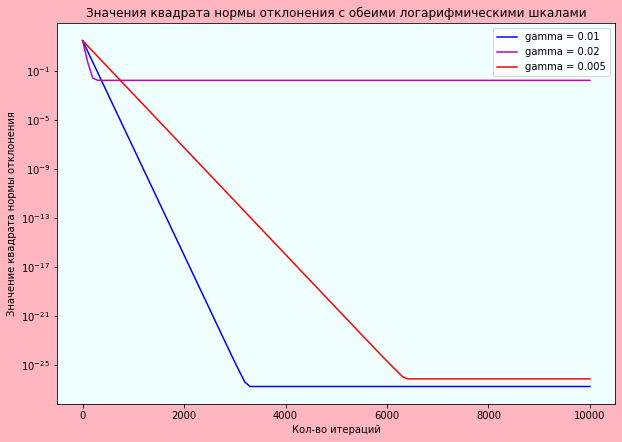

In [10]:
plt.figure(figsize=(10,7),facecolor = "lightpink") 
#
line1, = plt.plot(values_x, values_y1, 'b')
line2, = plt.plot(values_x, values_y2, 'm')
line3, = plt.plot(values_x, values_y3, 'r')
plt.legend((line1, line2, line3), ['gamma = 0.01', 'gamma = 0.02', 'gamma = 0.005'])
plt.semilogy()
ax = plt.axes()
ax.set_facecolor("azure")
#plt.fill_between(values_x, values_y, color = 'salmon')
plt.xlabel("Кол-во итераций")
plt.ylabel("Значение квадрата нормы отклонения")
plt.title('Значения квадрата нормы отклонения с обеими логарифмическими шкалами')
plt.show()

__(ж)__ Для задачи с $\mu = 0$ и $L = 1000$, проделайте те же действия, что и в пунктах (в), (г) с числом итераций равным $10^5$. Сделайте вывод.

In [11]:
mu = 0
L = 1000
A = generating_matrix(d,mu,L)
Lambda = min(np.linalg.eigvals(A))
A = A - Lambda*np.identity(d)
x_0 = np.linalg.solve(A,b)
vector,values_x,values_y = gradient_descent2(start, 1/L,10001,1e-7)
print((vector-x_0).dot((vector-x_0).T))

1.8484439947814307e+28


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/3884679226.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


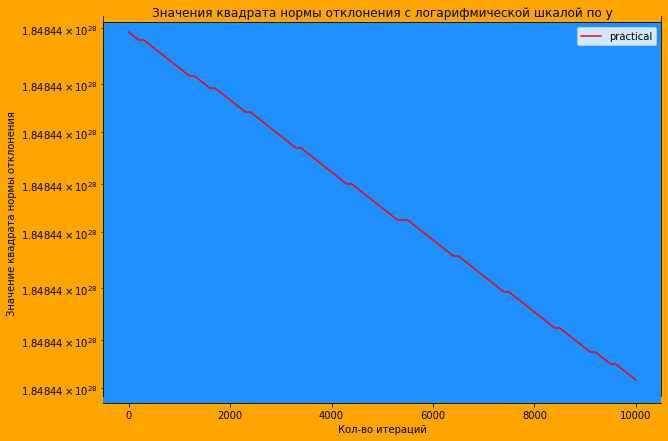

In [12]:
plt.figure(figsize=(10,7), facecolor = "orange") 
plt.plot(values_x, values_y,color = 'red')
ax = plt.axes()
ax.set_facecolor("dodgerblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
plt.legend(['practical'])
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("Кол-во итераций")
plt.ylabel("Значение квадрата нормы отклонения")
plt.title('Значения квадрата нормы отклонения с логарифмической шкалой по y')
plt.show()

#### Вывод:
Из графика видно, что при данных значениях постоянных метод не сходится

__(з)__ Все ли получилось в предыдущем пункте? Если нет, то поясните почему (если это еще не сделано в выводах прошлого пункта). Проделайте пункты (в)-(e), но с критерием сходимости $f(x_k) - f(x^*)$ и/или $f(\bar x_k) - f(x^*)$ (здесь $\bar x_k$ - средняя точка на текущей и предыдущих итерациях). Сделайте вывод.

In [13]:
mu = 1
L = 100
A = generating_matrix(d,mu,L)
x_0 = np.linalg.solve(1/2*(A+A.T),b)


def f(x):
    return 1/2*(x.T).dot(A).dot(x) - b*x

def gradient_descent3(start, learn_rate, n_iter, tolerance):
    values_x = []
    values_y = []
    vector = start
    for i in range(n_iter):
        diff = -learn_rate * gradient(vector)
        #if np.all((vector-x_0).dot(vector-x_0) <= tolerance):
        #    break
        vector = vector + diff
        if (i % 100 == 0):
            values_y.append(float((f(vector)-f(x_0)).dot(f(vector)-f(x_0))))
            values_x.append(i)
    return vector, values_x, values_y

def gradient_descent4(start, learn_rate, n_iter, tolerance):
    values_x = []
    values_y = []
    vector = start
    vector2 = start
    for i in range(n_iter):
        diff = -learn_rate * gradient(vector)
        #if np.all((vector-x_0).dot(vector-x_0) <= tolerance):
        #    break
        vector = vector + diff
        vector2 = vector + diff/2
        if (i % 100 == 0):
            values_y.append(float((f(vector2)-f(x_0)).dot(f(vector2)-f(x_0))))
            values_x.append(i)
    return vector, values_x, values_y

vector, values_x1, values_y1 = gradient_descent3(start, 1/L,4001,1e-7)
vector, values_x2, values_y2 = gradient_descent4(start, 1/L,4001,1e-7)


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/1928028267.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


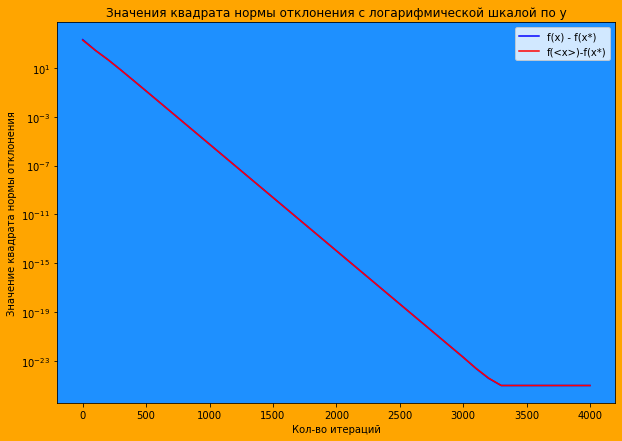

In [14]:
plt.figure(figsize=(10,7), facecolor = "orange") 
line1, = plt.plot(values_x1, values_y1, 'b')
line3, = plt.plot(values_x2, values_y2, 'r')
plt.legend((line1, line3), ['f(x) - f(x*)', 'f(<x>)-f(x*)'])
ax = plt.axes()
ax.set_facecolor("dodgerblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("Кол-во итераций")
plt.ylabel("Значение квадрата нормы отклонения")
plt.title('Значения квадрата нормы отклонения с логарифмической шкалой по y')
plt.show()

#### Вывод:
Были построены графики для критериев в виде $||f(x) - f(x^*)||$ и $||f(<x>) - f(x^*)||$. Графики практически совпадают на нашей сгенерированной матрице, а также хорошо сходятся.
###  На графике линии трудноразличимы

In [15]:
#___________ooo_____­____________________­_________________ooo­ooooooo 
#________ooooooooo__­____________________­_______________ooooo­ooooooooooo 
#______ooooooooooooo­____________________­_____________ooooooo­ooooooooooooo 
#____ooooooooooooooo­oo_______________ooo­ooooo_____oooooooooo­ooooooooooooooo 
#___ooooooo_____oooo­oooo________oooooooo­oooooooooooooooooo__­_____oooooooooooo 
#___¦oooo______oo_oo­oooooooooooooooooooo­ooooooooooooooooo___­__ooooooooooooooo¦ 
#__¦ooooooo_ooo_____­oooooooooooooooooooo­ooooooooooooooo¦____­_oooooooooooooooooo 
#_oooooooooo_____oo_­_ooooooooooooooooooo­ooooooooooooooo___o_­oooooooooooooooooo¦ 
#_¦ooooooooo__ooo___­___ooooooooooooooooo­oooooooooooooo¦_____­ooooooooooooooooooo 
#_¦ooooooooooo_____o­o____ooooooooooooooo­oooooooooooooo¦_o_o_­__oooooooooooooooooo­ 
#_oooooooooo____ooo_­__o___¦ooooooooooooo­ooooooooooooooo_____­ooooooooooooooooooo¦­ 
#_¦ooooooooooooo___o­oo____oooooooooooooo­oooooooooooooooo_o__­ooooooooooooooooooo¦­ 
#_oooooooooooooooooo­o____¦oooooooooooooo­oooooooooooooooo¦___­___oooooooooooooooo¦­ 
#__¦oooooooooooooooo­__oo_ooo¦_oooooooooo­oooooooooooooooooo__­_ooooo_____o____ooo¦­ 
#__oooooooooooooooo_­_____¦oo_ooooooooooo­oooooooooooo_¦_ooo¦_­__ooo_ooooo______¦o¦­ 
#___¦ooooooooooooo__­_oo___oooooooooooooo­ooooooooooooo_ooooo¦­_o__oooo______o___o¦­ 
#___oooo_o__oooo___o­oo______oooooooooooo­ooooooooooooooooooo¦­_______o____o____¦o 
#____oooo__o_o____oo­_____o___¦oooooooooo­ooooooooooooooooooo_­___o____ooooo___ooo 
#_____oooooo____oo__­__________oo_ooooooo­oooooo¦ooooooooooo¦_­o______o___ooooooo¦ 
#______ooo___o_oo___­__o____o__oooooooooo­ooo_o¦_o_ooooooooo__­__ooooo_____o___oo¦ 
#_______oo___oo_____­o____o___¦oooooooooo­ooooo¦_oo_oooooo¦___­____oooooo_____¦oo 
#________ooooo____oo­__________¦ooooooooo­ooooo¦¦ooo_oooooo_o_­o_______ooooo_ooo 
#_________oo____oo__­__¦_____oo¦o_ooooooo­ooooo¦¦ooo¦ooooo____­_oooo_______oooo 
#__________oo_ooo___­_o_____¦oo¦ooooooooo­ooo_o¦ooooo_________­o__oooooo_oooo 
#___________ooo_____­¦¦_____oo¦¦ooooooooo­ooooo_ooooo¦_o__o_o_­______ooooooo_o 
#____________oo____o­____o_¦oo¦¦o_ooooooo­ooooo_ooooo¦_______o­oo__o__oooo_oooo 
#_____________ooo_¦¦­______¦oo¦¦ooooooooo­ooooo_¦ooooo__o_____­_ooo__oooo_ooooo¦ 
#______________oooo_­__o___ooo¦¦ooooooooo­oo_o¦__ooooo¦__ooo__­__oooooo_ooooooo¦ 
#________________ooo­_____¦ooo_¦ooooooooo­oooo¦__¦ooooo____ooo­__oooo_ooooooooo¦ 
#_________________oo­oo___¦ooo__o_ooooooo­oooo¦___ooooo__o___o­ooooo_¦ooooooooo¦ 
#___________________­_oo___ooo¦_ooooooooo­oooo_o_____ooo__o___­_oooo_¦o_ooooooo¦ 
#___________________­____oooooo_ooooooooo­o_o¦__o___ooooo_____­oooo¦_oo¦ooooooo¦ 
#___________________­____oooo¦__ooooooooo­ooo¦______¦oooo¦___¦­_ooo¦¦o¦¦ooooooo¦ 
#___________________­___¦ooo¦___o__oooooo­ooo¦___o___ooooo___o­oooo¦¦o¦¦oooooooo 
#___________________­___oooo___¦¦oooooooo­ooo________¦oooo__oo­oooo_oo¦ooooooo¦ 
#___________________­___ooo¦___o¦oooooooo­oo¦____o____oooo__oo­oooo¦o¦_ooo¦oooo 
#___________________­__¦ooo¦__¦o¦oooooooo­oo¦__o___o__¦oo¦_¦__­ooo¦_¦_¦oo¦¦ooo 
#___________________­__¦ooo___oo¦¦o_ooooo­_o¦_________ooo__¦oo­ooo¦__¦ooo_oo¦ 
#___________________­___oo¦___oo¦¦ooooooo­oo________oooo¦_oooo­ooo__¦oooo¦oo 
#___________________­___¦o¦__¦oo¦¦ooooooo­oo____oooooooo_¦__oo­ooo_¦oooo_¦¦ 
#_____________o_____­____o¦__¦ooo_ooooooo­o¦______ooo__ooooooo­oo¦_oooo_¦¦ 
#___________ooo____­_____o__¦ooo_ooooooo­o¦__o_____oooooooooo­oo_¦ooo__¦oo¦ 
#__________ooo_oooo_­_____¦__¦ooo¦ooooooo­o________¦oooooooooo­o___o__ooooo 
#________ooo__o__ooo­________¦ooo¦¦o_oooo­o________¦__oooooooo­¦__ooooooooo 
#_______oo__ooooo__o­________¦ooo¦¦oooooo­¦________ooooooooooo­o__oooooooo¦_______o­o 
#______oo_oooooooo¦_­o________ooo¦¦oooo_o­¦___o____oooooooooo_­__¦oo_ooooo______ooo­ 
#____ooo_ooooooooo__­oo__oo___oooo_oooooo­¦_______¦__ooooooo¦_­__oo¦¦oooo¦___ooooo 
#__ooo_oooooooooo__o­_oooo____¦ooo¦oooooo­¦_______¦oooooooooo_­_¦oo_ooooo__oooo 
#_ooo_oooooooooo____­oooooooo_¦ooo¦¦ooooo­o_______ooooooooo¦__­_oo_¦oooo¦_ooooooooo­o 
#oo__oooooooooo_ooo_­_ooooooo¦¦ooo¦_ooooo­o¦___o__ooooooooo¦_o­o_oooooooooooooooooo­o 
#o_ooooooooooo_¦oooo­o_ooooooo_oooo_¦oooo­oo______¦oooooooo¦__­ooooo oooooooooooooo 
#_oooooooooo¦__ooooo­ooooooooo¦ooooo__ooo­ooo_oooooooooooooooo­ooooooooooooooooooo 
#¦oooooooooo__¦ooooo­ooooooooooooooooo_oo­oooo_ooooooooooooooo­oooooooooooooooooo_o­o 
#¦ooooooooo___oooooo­oooooooooooooooooooo­_oo_oooooooooooooooo­ooooooooooooooooo_oo­o

# __Бонусные пункт__

Исследуйте другие техники подбора шага, озвученные на семинаре: 

1) Уменьшающийся с номером итерации шаг,

2) Наискорейший спуск: $\gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k))$,

3) Правила Армихо, Вульфа и Гольдстейна: смотри параграф 3.1 из https://www.csie.ntu.edu.tw/~r97002/temp/num_optimization.pdf,

4) Шаг Поляка-Шора: $\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}$, где $\alpha \geq 1$.

Эксперименты нужно провести, как для сильно выпуклых, так и выпуклых задач. Сравните не только число итераций, но и время работы методов. Учтите, что правила Армихо, Вульфа, Гольстейна и Поляка-Шора требуют подбора дополнительных параметров эврестически (поиграйте с этими параметрами отдельно и выберете какой подходит лучше).

In [16]:
## Adding constants
L = 100
mu = 1
gamma = 1/L
d = 100
E = np.eye(d)


###   По каждому методу будем строить 2 графика зависимости критерия сходимости от количества итераций. Будем использовать 2 критерия: квадрат нормы градиента и близость точки к желаемому ответу. Второй критерий нужен затем, что первый не всегда объективно оценивает точность результата (поскольку градиент может быть мал, но результат далек от идеала - такое встречается особенно в несильно выпуклых задачах. В конце построим 2 графика, на котором соберем все методы для сильно-выпуклой задачи и построим зависимость их сходимости по времени и по числу итераций. 

### 1. Уменьшающийся с номером итерации шаг
#### Генерация матрицы
Мы уже генерировали матрицу $A$ так, чтобы f была сильно-выпуклой с параметром $\mu$. Если же теперь рассмотреть $A_2 = A - \mu I$, то новая матрица будет соответствовать выпуклой задаче.


In [17]:
b1 = np.random.uniform(0, 10, d)
A1 = generating_matrix(d,mu,L)
A1 = A1 - mu * E    #  выпуклая задача

b = np.random.uniform(0, 10, d)
A = generating_matrix(d,mu,L)    # сильно-выпуклая задача

In [18]:
from math import log
def gradient(x, A, b):
    return ((A).dot(x) - b)
start = np.ones(d)

def gradient_descent_decreasing_step(start, learn_rate, n_iter, A, b, x):
    values_x = []
    values_y = []
    values_yy = []
    vector = start
    vector_list = []
    begin_time = time.time()
    timeprogGDP = []
    grad = gradient(vector, A, b)
    for i in range(n_iter):
        diff = -learn_rate/log(i+5) * grad
        vector = vector + diff
        grad = gradient(vector, A, b)
        values_y.append((x - vector).T.dot(x - vector))
        values_yy.append((grad).T.dot(grad))
        values_x.append(i+1)
        vector_list.append(vector)
        timeprogGDP.append(time.time() - begin_time)
    return values_x, values_y, values_yy, vector_list, timeprogGDP



In [19]:
x1 = np.linalg.solve(1/2*(A+A.T),b)
x2 = np.linalg.solve(1/2*(A1+A1.T),b1)

values_x1, values_y1, values_yy1, vector_list1, time1 = gradient_descent_decreasing_step(start, 8/L,4001, A, b, x1)
values_x2, values_y2, values_yy2, vector_list2, time2 = gradient_descent_decreasing_step(start, 8/L,4001, A1, b1, x2)

/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/365252308.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/365252308.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


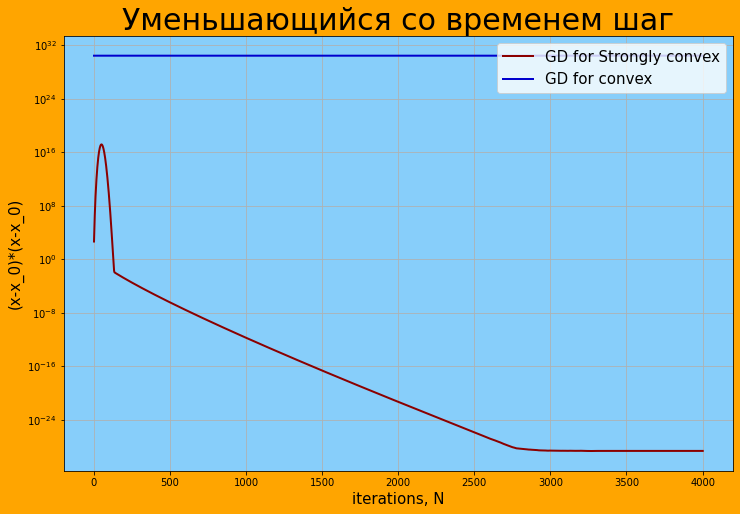

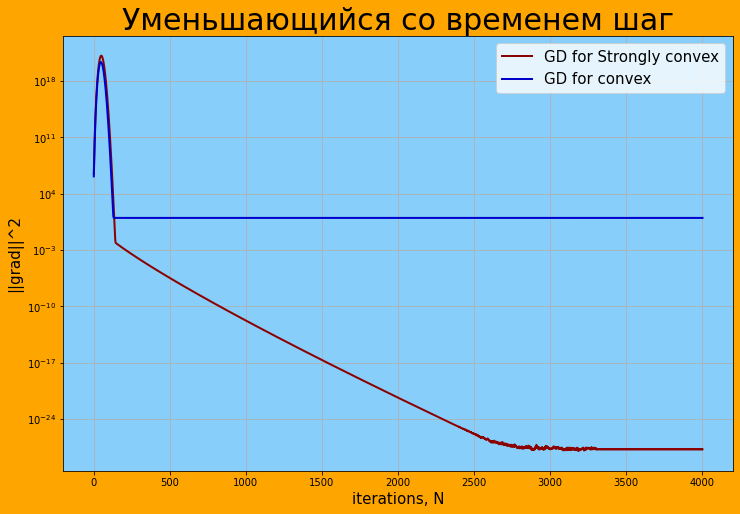

In [20]:
plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(values_x1, values_y1, 'darkred',  linewidth=2, label = 'GD for Strongly convex')
line2, = plt.plot(values_x2, values_y2, 'mediumblue',  linewidth=2, label = 'GD for convex')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("(x-x_0)*(x-x_0)", fontsize=15)
plt.title('Уменьшающийся со временем шаг', fontsize=30)
plt.grid()

plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(values_x1, values_yy1, 'darkred',  linewidth=2, label = 'GD for Strongly convex')
line2, = plt.plot(values_x2, values_yy2, 'mediumblue',  linewidth=2, label = 'GD for convex')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("||grad||^2", fontsize=15)
plt.title('Уменьшающийся со временем шаг', fontsize=30)
plt.grid()

#### Вывод: 
Из графиков видно, что в выпуклом случае градиентный спуск не сходится к оптимуму, результат спуск далек от верной точки. Сам градиент убывает, но не сильно. В сильно же выпуклом случае переменный шаг дал возможность добиться хороших результатов. 

### 2. Наискорейший спуск

Получим явный вид:

$ \gamma_k = \arg\min_{\gamma} f(x_k - \gamma \nabla f(x_k)) \\ $
Пусть $f_{k + 1} = f(x_k - \gamma \nabla f(x_k))$. 
Ищем минимум: производная функции $f $ равна нулю. Получим $ \nabla f_{k + 1}^T \nabla f_k = 0 \\$
Тк $\nabla f_{k + 1} = (Ax_{k + 1} - b) \Longrightarrow ~
(Ax_{k + 1} - b)^T \nabla f(x_k) = 0 \\ $

Пусть $g = \nabla f(x_k) \Longrightarrow (x_k -\gamma g)Ag -b^Tg = 0$
Преобразуем:
$ x_k^TAg -\gamma g^TAg -b^Tg = 0  \Longrightarrow
g^Tg - \gamma g^TAg = 0  \Longrightarrow
\gamma = \frac{g^Tg}{g^TAg}$. $ \\ $
Тогда итоговая формула шага приобретет вид: 
$~ x_{k+1} = x_k - \frac{g^Tg}{g^TAg}\cdot g;
$

In [21]:
def gradient_descent_fastest(start, n_iter, A, b, x):
    values_x = []
    values_y = []
    values_yy = []
    vector = start
    vector_list = []
    begin_time = time.time()
    timeprogGDP = []
    grad = gradient(vector, A, b)
    for i in range(n_iter):
        diff = -grad.T.dot(grad)/(grad.T.dot(A).dot(grad)) * grad
        vector = vector + diff
        grad = gradient(vector, A, b)
        values_y.append((x - vector).T.dot(x - vector))
        values_yy.append((grad).T.dot(grad))
        values_x.append(i+1)
        vector_list.append(vector)
        timeprogGDP.append(time.time() - begin_time)
    return values_x, values_y, values_yy, vector_list, timeprogGDP


values_x_fastest, values_y_fastest, values_yy_fastest, vector_list_fastest, time_fastest = gradient_descent_fastest(start,4001, A, b, x1)
values_x1_fastest, values_y1_fastest, values_yy1_fastest, vector_list1_fastest, time1_fastest = gradient_descent_fastest(start,4001, A1, b1, x2)

/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/1018481401.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/1018481401.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


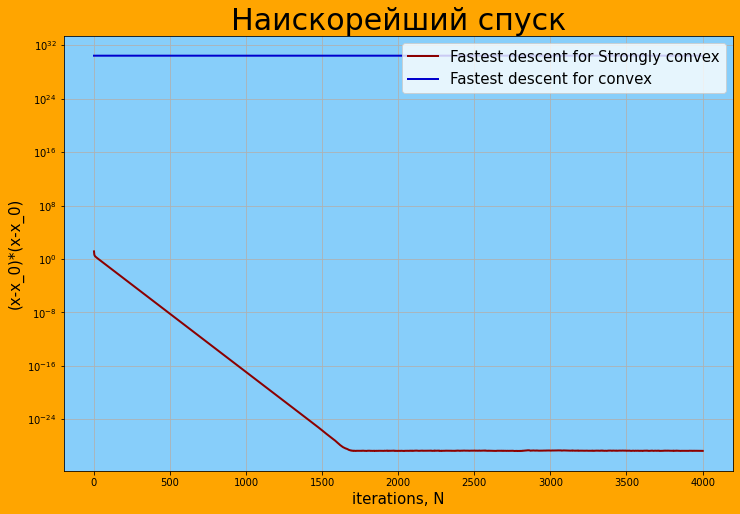

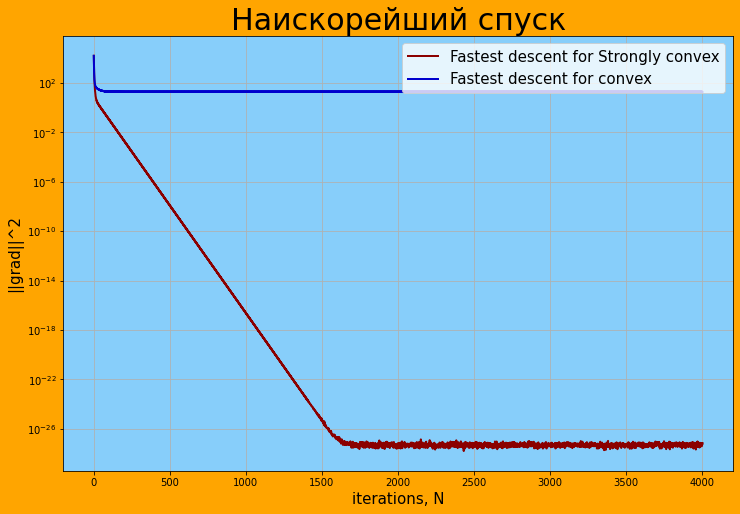

In [22]:
plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(values_x_fastest, values_y_fastest, 'darkred',  linewidth=2, label = 'Fastest descent for Strongly convex')
line2, = plt.plot(values_x1_fastest, values_y1_fastest, 'mediumblue',  linewidth=2, label = 'Fastest descent for convex')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("(x-x_0)*(x-x_0)", fontsize=15)
plt.title('Наискорейший спуск', fontsize=30)
plt.grid()

plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(values_x_fastest, values_yy_fastest, 'darkred',  linewidth=2, label = 'Fastest descent for Strongly convex')
line2, = plt.plot(values_x1_fastest, values_yy1_fastest, 'mediumblue',  linewidth=2, label = 'Fastest descent for convex')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("||grad||^2", fontsize=15)
plt.title('Наискорейший спуск', fontsize=30)
plt.grid()

#### Вывод: 
Получили похожий результат, только в данном случае сходится быстрее. Из графиков видно, что в выпуклом случае градиентный спуск не сходится к оптимуму, результат спуск далек от верной точки. Сам градиент убывает, но не сильно. В сильно же выпуклом случае наискорейший спуск дал возможность добиться хороших результатов. 

### 3. Правила Армихо, Вульфа и Гольдстейна

#### a) Правило Армихо
Заданы числа $\gamma_0 > 0; \theta, \varepsilon \in (0,1)$. Величина $\gamma $ выбирается итеративно: изначально $\gamma = \gamma_0$, затем на каждом шаге проверяется выполнение
\begin{equation}
    f(x_{k + 1}) < f(x_k) - \varepsilon\gamma  \nabla f_k^T\nabla f.
\end{equation}

В случае выполнения процедура останавливается и $\gamma_k = \gamma$, иначе полагаем $\gamma := \theta \gamma$, и процедура продолжается.
Это неравенство и называется правилом Армихо. В эксперименте положим $\gamma_0 = 1, \varepsilon = \frac{4}{5}, \theta = 0.99$

In [23]:
def f(x, A, b):
    return (1/2*x.T.dot(A).dot(x) - b.T.dot(x))

##################### ARMIJO #####################
def gradient_descent_Armijo(start, n_iter, A, b, x, gamma_0, epsilon, theta):
    values_x = []
    values_y = []
    values_yy = []
    vector = start
    vector_list = []
    begin_time = time.time()
    timeprogGDP = []
    grad = gradient(vector, A, b)
    gamma = gamma_0
    for i in range(n_iter):
        diff = -gamma*grad
        while (f(vector + diff, A, b) >= f(vector, A, b) - epsilon*gamma*grad.T.dot(grad)):
            gamma = gamma * theta
            diff = -gamma*grad
        vector = vector + diff
        grad = gradient(vector, A, b)
        values_y.append((x - vector).T.dot(x - vector))
        values_yy.append((grad).T.dot(grad))
        values_x.append(i+1)
        vector_list.append(vector)
        timeprogGDP.append(time.time() - begin_time)
    return values_x, values_y, values_yy, vector_list, timeprogGDP


In [24]:
values_x_Armijo, values_y_Armijo, values_yy_Armijo, vector_list_Armijo, time_Armijo = gradient_descent_Armijo(start, 1701, A, b, x1, 1, 0.8, 0.99)
values_x1_Armijo, values_y1_Armijo, values_yy1_Armijo, vector_list1_Armijo, time1_Armijo = gradient_descent_Armijo(start,1701, A1, b1, x2, 1, 0.8, 0.99)

/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/1224885987.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/1224885987.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


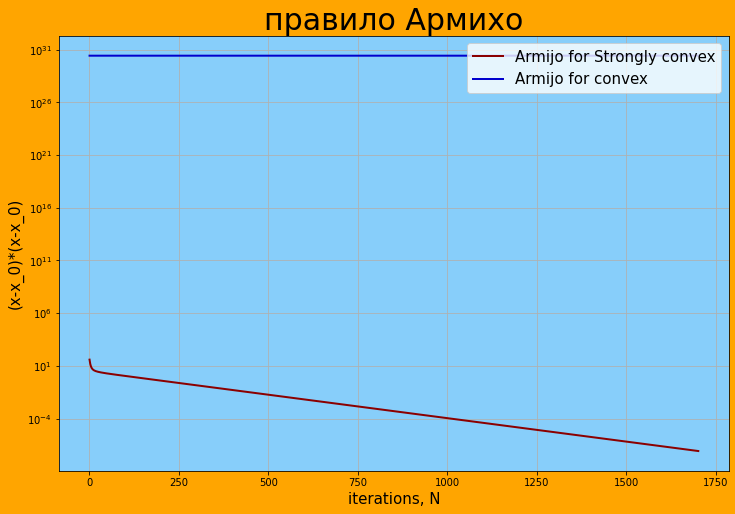

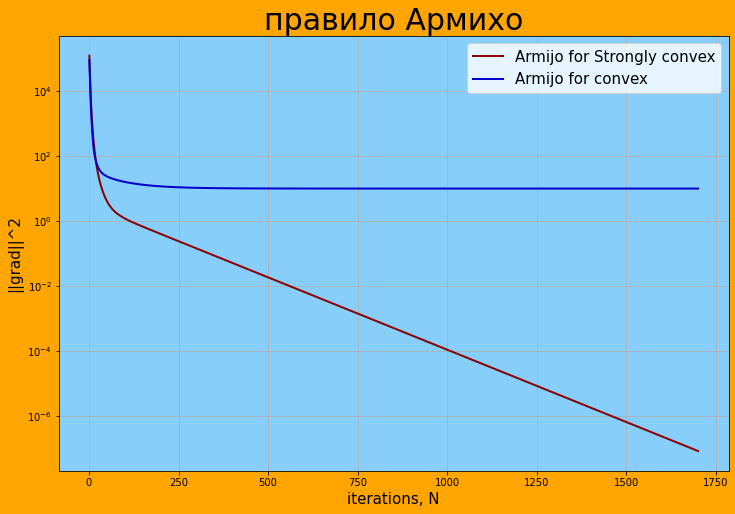

In [25]:
plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(values_x_Armijo, values_y_Armijo, 'darkred',  linewidth=2, label = 'Armijo for Strongly convex')
line2, = plt.plot(values_x1_Armijo, values_y1_Armijo, 'mediumblue',  linewidth=2, label = 'Armijo for convex')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("(x-x_0)*(x-x_0)", fontsize=15)
plt.title('правило Армихо', fontsize=30)
plt.grid()

plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(values_x_Armijo, values_yy_Armijo, 'darkred',  linewidth=2, label = 'Armijo for Strongly convex')
line2, = plt.plot(values_x1_Armijo, values_yy1_Armijo, 'mediumblue',  linewidth=2, label = 'Armijo for convex')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("||grad||^2", fontsize=15)
plt.title('правило Армихо', fontsize=30)
plt.grid()

Правило Армихо сходится хуже, чем предыдущий метод

#### б) Условие Вульфа: 

Допустим мы хотим, чтобы функция мало того чтобы убывала достаточно, но и чтобы градиент был не слишком маленьким. Тогда запишем условие Вульфа: 
\begin{equation}
f(x_{k + 1}) \leq f(x_k) - c_1\alpha \nabla f^T(x_k)\nabla f(x_k) \\
\nabla f(x_{k + 1})^T \nabla f(x_k) \leq  c_2 \nabla f^T (x_k)\nabla f(x_k)
\end{equation}
Константы выбираются следующим образом: $0 < c_1 < c_2 < 1$. Обычно константа $c_1$ выбирается достаточно маленькой (например, $10^{-4}$), что означает, что функция после совершения шага должна уменьшиться, в то время как $c_2$ выбирается значительно большей (в окрестности 1), что, в свою очередь, означает, что проекция градиента в новом приближении должна либо изменить направление, либо уменьшиться.
$ \\ $

In [26]:
##################### WOLFE #####################
def Wolfe_conditions(c1, c2, x, A, b, alpha, grad):
    grad2 = grad.T.dot(grad)
    first_condition = (f(x - alpha*grad, A, b) <= f(x, A, b) - c1*alpha*grad2)
    second_condition = (gradient(x - alpha*grad, A, b).dot(grad) >= - c2 * grad2)
    
def alpha1(x, A, b, grad, c1):
    return (2*c1*grad.T.dot(grad) - (x.T.dot(A).dot(grad) + grad.T.dot(A).dot(x)) + 2*b.T.dot(grad))/(grad.T.dot(A).dot(grad))
def alpha2(A, grad, c2):
    return (2*(1-c2)*grad.T.dot(grad))/(grad.T.dot(A).dot(grad) + grad.T.dot(A.T).dot(grad))

def gradient_descent_Wolfe(start, n_iter, A, b, x, c1, c2):
    values_x = []
    values_y = []
    values_yy = []
    vector = start
    vector_list = []
    begin_time = time.time()
    timeprogGDP = []
    grad = gradient(vector, A, b)
    for i in range(n_iter):
        a1 = alpha1(vector, A, b, grad, c1)
        a2 = alpha2(A, grad, c2)
        #print(a1, a2, '---')
        alpha = np.random.uniform(max(a1, 0), a2, 1)
    
        diff = -grad*alpha
        vector = vector + diff
        grad = gradient(vector, A, b)
        values_y.append((x - vector).T.dot(x - vector))
        values_yy.append((grad).T.dot(grad))
        values_x.append(i+1)
        vector_list.append(vector)
        timeprogGDP.append(time.time() - begin_time)
    return values_x, values_y, values_yy, vector_list, timeprogGDP

In [27]:
values_x_Wolfe, values_y_Wolfe, values_yy_Wolfe, vector_list_Wolfe, time_Wolfe = gradient_descent_Wolfe(start, 2001, A, b, x1, 0.01, 0.9)
values_x1_Wolfe, values_y1_Wolfe, values_yy1_Wolfe, vector_list1_Wolfe, time1_Wolfe = gradient_descent_Wolfe(start,2001, A1, b1, x2, 0.01, 0.9)

/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/4133771401.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/4133771401.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


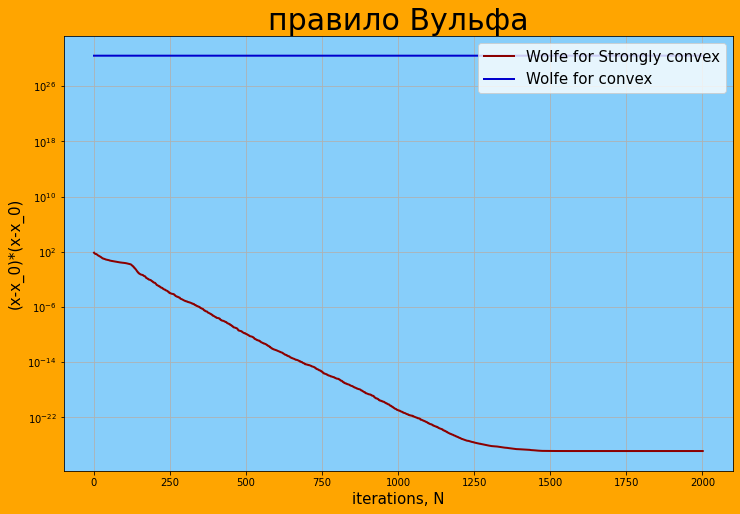

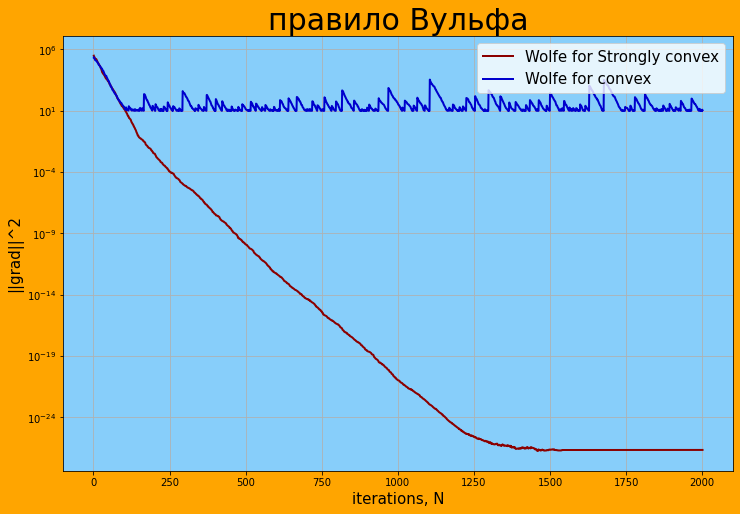

In [28]:
plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(values_x_Wolfe, values_y_Wolfe, 'darkred',  linewidth=2, label = 'Wolfe for Strongly convex')
line2, = plt.plot(values_x1_Wolfe, values_y1_Wolfe, 'mediumblue',  linewidth=2, label = 'Wolfe for convex')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("(x-x_0)*(x-x_0)", fontsize=15)
plt.title('правило Вульфа', fontsize=30)
plt.grid()

plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(values_x_Wolfe, values_yy_Wolfe, 'darkred',  linewidth=2, label = 'Wolfe for Strongly convex')
line2, = plt.plot(values_x1_Wolfe, values_yy1_Wolfe, 'mediumblue',  linewidth=2, label = 'Wolfe for convex')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("||grad||^2", fontsize=15)
plt.title('правило Вульфа', fontsize=30)
plt.grid()

Правило Вульфа показало лучший результат как по качеству сходимости для сильно-выпуклой задачи, так и по количеству итераций.

#### с) Условие Гольдcтейна: 

Мы хотим минимизировать значение функции после каждого шага, то есть такую функцию:
\begin{equation}
\phi(\eta) = f(x_k - \eta\nabla f(x_k)), \eta \geq 0 
\end{equation}
Заведём две линейные функции:
\begin{equation}
\phi_1(\eta) = f(x_k) - (1-c)\eta||\nabla f(x_k)||^2  \\
\phi_2(\eta) = f(x_k) - c\eta||\nabla f(x_k)||^2, ~ c \in (0,\frac{1}{2})
\end{equation}
Должно быть выполнено условие:$ \phi_1(\eta_k) \leq \phi(\eta) \leq \phi_2(\eta_k)$.
В противном случае домножаем наше  $\eta := \eta \sigma$, где $\sigma < 1$

In [29]:
def Goldstein_conditions(x, c, grad, nu):
    phi = f(x - nu*grad, A, b)
    fx = f(x, A, b)
    phi1 = fx - (1-c)*nu*grad.T.dot(grad)
    phi2 = fx - c*nu*grad.T.dot(grad)
    first_condition = (phi1 <= phi)
    second_condition = (phi <= phi2)
    return (first_condition and second_condition)

##################### GOLDSTEIN #####################
def gradient_descent_Goldstein(start, n_iter, A, b, x, nu_0, sigma, c):
    values_x = []
    values_y = []
    values_yy = []
    vector = start
    vector_list = []
    begin_time = time.time()
    timeprogGDP = []
    nu = nu_0
    grad = gradient(vector, A, b)
    for i in range(n_iter):
        diff = -nu*grad
        while (not Goldstein_conditions(vector, c, grad, nu)):
            nu = nu * sigma
            diff = -nu*grad
        #print(nu)
        vector = vector + diff
        nu = nu_0
        grad = gradient(vector, A, b)
        values_y.append((x - vector).T.dot(x - vector))
        values_yy.append((grad).T.dot(grad))
        values_x.append(i+1)
        vector_list.append(vector)
        timeprogGDP.append(time.time() - begin_time)
    return values_x, values_y, values_yy, vector_list, timeprogGDP


In [30]:
values_x_Goldstein, values_y_Goldstein, values_yy_Goldstein, vector_list_Goldstein, time_Goldstein = gradient_descent_Goldstein(start, 1701, A, b, x1, 1, 0.9, 0.05)
values_x1_Goldstein, values_y1_Goldstein, values_yy1_Goldstein, vector_list1_Goldstein, time1_Goldstein = gradient_descent_Goldstein(start,1701, A1, b1, x2, 1, 0.9, 0.05)


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/2534201419.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/2534201419.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


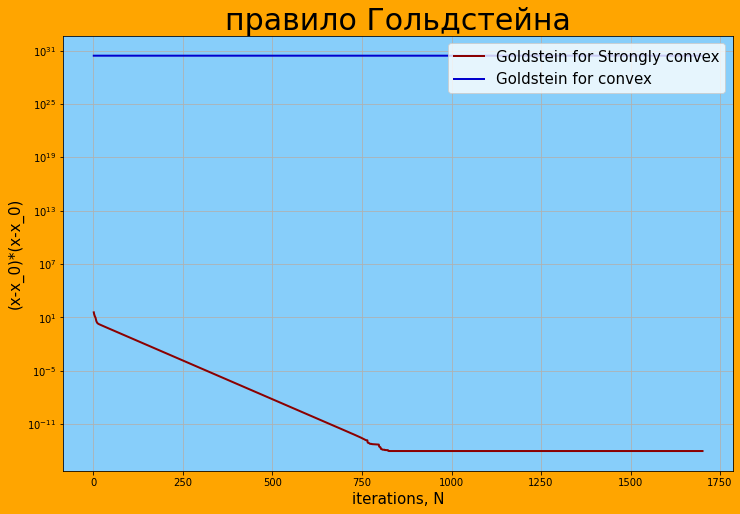

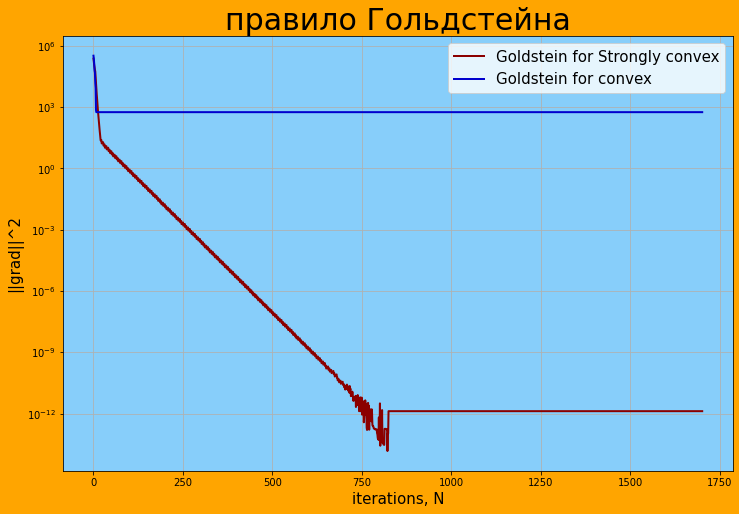

In [31]:
plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(values_x_Goldstein, values_y_Goldstein, 'darkred',  linewidth=2, label = 'Goldstein for Strongly convex')
line2, = plt.plot(values_x1_Goldstein, values_y1_Goldstein, 'mediumblue',  linewidth=2, label = 'Goldstein for convex')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("(x-x_0)*(x-x_0)", fontsize=15)
plt.title('правило Гольдстейна', fontsize=30)
plt.grid()

plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(values_x_Goldstein, values_yy_Goldstein, 'darkred',  linewidth=2, label = 'Goldstein for Strongly convex')
line2, = plt.plot(values_x1_Goldstein, values_yy1_Goldstein, 'mediumblue',  linewidth=2, label = 'Goldstein for convex')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("||grad||^2", fontsize=15)
plt.title('правило Гольдстейна', fontsize=30)
plt.grid()

Можно заметить, что при в начале метод оказался перспективным, достиг точности $10^{-10}$, однако далее перестал сходиться. Этот результат лучше, чем у Армихо, но хуже, чем у Вульфа.

#### 4. Шаг Поляка - Шора:
Допустим мы знаем приблизительно знаем значение минимума функции. Тогда эвристически можно сказать, что чем ближе к ней, тем меньше должен быть шаг. Чтобы он не ушёл совсем ноль когда близко к минимуму, отнормируем на градиент и получем так называемый шаг Поляка - Шора
\begin{equation}
\gamma_k = \tfrac{f(x^k) - f(x^*)}{\alpha \|\nabla f(x^k)\|^2}
\end{equation}

In [32]:
def gradient_descent_Polyak(start, n_iter, A, b, x, alpha):
    values_x = []
    values_y = []
    values_yy = []
    vector = start
    vector_list = []
    begin_time = time.time()
    timeprogGDP = []
    grad = gradient(vector, A, b)
    grad2 = grad.T.dot(grad)
    fx0 = f(x, A, b)
    for i in range(n_iter):
        diff = -(f(vector, A, b) - fx0)*grad/(alpha*grad2)
        vector = vector + diff
        grad = gradient(vector, A, b)
        grad2 = grad.T.dot(grad)
        values_y.append((x - vector).T.dot(x - vector))
        values_yy.append(grad2)
        values_x.append(i+1)
        vector_list.append(vector)
        timeprogGDP.append(time.time() - begin_time)
    return values_x, values_y, values_yy, vector_list, timeprogGDP

values_x_Polyak, values_y_Polyak, values_yy_Polyak, vector_list_Polyak, time_Polyak = gradient_descent_Polyak(start,4001, A, b, x1, 1)
values_x1_Polyak, values_y1_Polyak, values_yy1_Polyak, vector_list1_Polyak, time1_Polyak = gradient_descent_Polyak(start, 4001, A1, b1, x2, 1)


/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/1744699536.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/1744699536.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


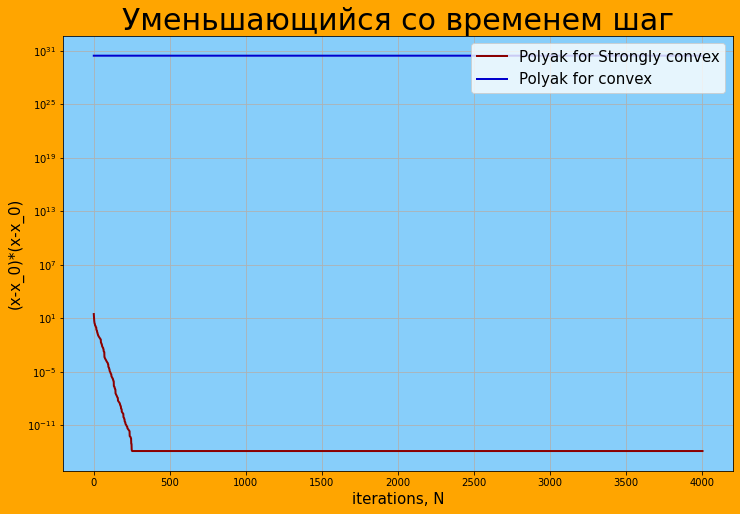

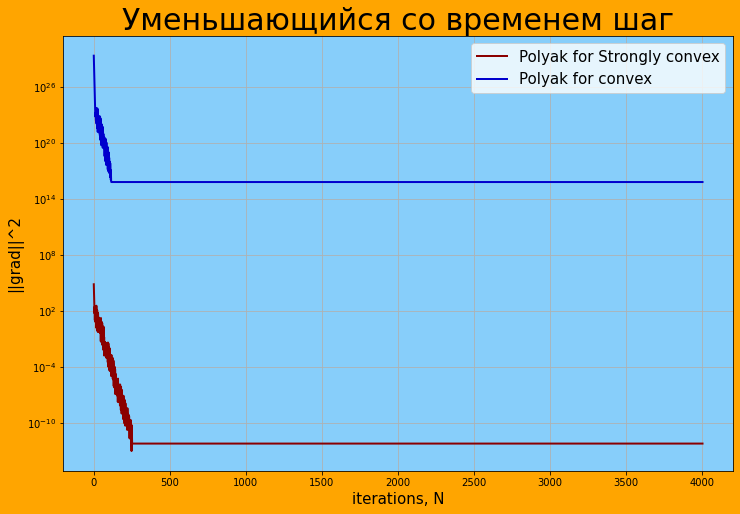

In [33]:
plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(values_x_Polyak, values_y_Polyak, 'darkred',  linewidth=2, label = 'Polyak for Strongly convex')
line2, = plt.plot(values_x1_Polyak, values_y1_Polyak, 'mediumblue',  linewidth=2, label = 'Polyak for convex')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("(x-x_0)*(x-x_0)", fontsize=15)
plt.title('Уменьшающийся со временем шаг', fontsize=30)
plt.grid()

plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(values_x_Polyak, values_yy_Polyak, 'darkred',  linewidth=2, label = 'Polyak for Strongly convex')
line2, = plt.plot(values_x1_Polyak, values_yy1_Polyak, 'mediumblue',  linewidth=2, label = 'Polyak for convex')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("||grad||^2", fontsize=15)
plt.title('Уменьшающийся со временем шаг', fontsize=30)
plt.grid()

Данный метод вышел на свой лучший результат раньше, чем остальные методы вышли данную точность. Она весьма хорошая, поэтому данный метод сходится быстрее всего. Однако максимальная точность получилась меньше, чем у наискорейшего спуска или Вульфа, например

#### Сравним все методы:

/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/780001786.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
/var/folders/2z/h4ypwr2j2f70t152_xqwp5w40000gn/T/ipykernel_8830/780001786.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


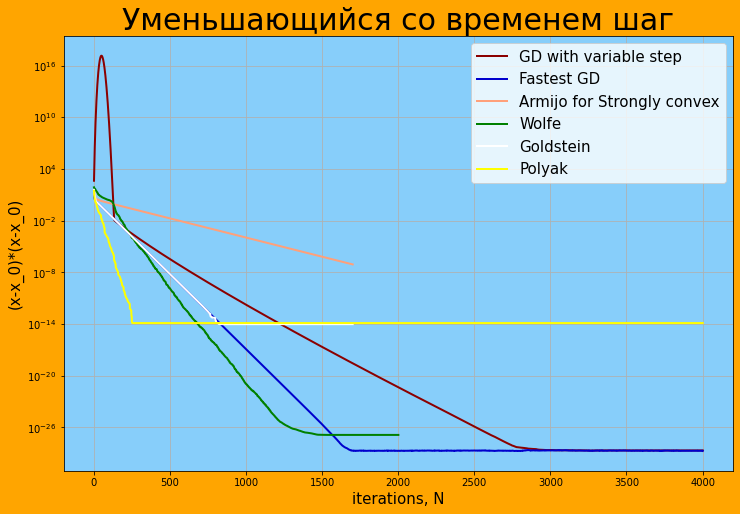

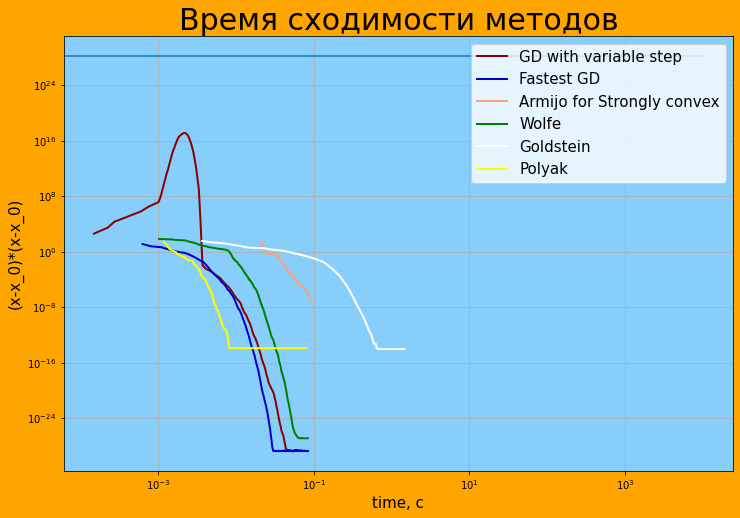

In [34]:
plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(values_x1, values_y1, 'darkred',  linewidth=2, label = 'GD with variable step')
line2, = plt.plot(values_x_fastest, values_y_fastest, 'mediumblue',  linewidth=2, label = 'Fastest GD')
line3, = plt.plot(values_x_Armijo, values_y_Armijo, 'lightsalmon',  linewidth=2, label = 'Armijo for Strongly convex')
line4, = plt.plot(values_x_Wolfe, values_y_Wolfe, 'green',  linewidth=2, label = 'Wolfe')
line5, = plt.plot(values_x_Goldstein, values_y_Goldstein, 'white',  linewidth=2, label = 'Goldstein')
line6, = plt.plot(values_x_Polyak, values_y_Polyak, 'yellow',  linewidth=2, label = 'Polyak')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
plt.semilogy()
#plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("iterations, N", fontsize=15)
plt.ylabel("(x-x_0)*(x-x_0)", fontsize=15)
plt.title('Уменьшающийся со временем шаг', fontsize=30)
plt.grid()

plt.figure(figsize=(12,8), facecolor = "orange") 
line1, = plt.plot(time1, values_y1, 'darkred',  linewidth=2, label = 'GD with variable step')
line2, = plt.plot(time_fastest, values_y_fastest, 'mediumblue',  linewidth=2, label = 'Fastest GD')
line3, = plt.plot(time_Armijo, values_y_Armijo, 'lightsalmon',  linewidth=2, label = 'Armijo for Strongly convex')
line4, = plt.plot(time_Wolfe, values_y_Wolfe, 'green',  linewidth=2, label = 'Wolfe')
line5, = plt.plot(time_Goldstein[:1000], values_y_Goldstein[:1000], 'white',  linewidth=2, label = 'Goldstein')
line6, = plt.plot(time_Polyak, values_y_Polyak, 'yellow',  linewidth=2, label = 'Polyak')
ax = plt.axes()
plt.legend(loc="upper right", fontsize=15)
ax.set_facecolor("lightskyblue")
#plt.semilogy()
plt.loglog(values_x,values_y)
#plt.fill_between(values_x, values_y, color = 'bisque')
plt.xlabel("time, c", fontsize=15)
plt.ylabel("(x-x_0)*(x-x_0)", fontsize=15)
plt.title('Время сходимости методов', fontsize=30)
plt.grid()

#### ВЫВОД: 
С несильно-выпуклой задачей данные методы не справляются. Однако в сильно-выпуклом случае были получены интересные результаты: $ \\ $
Из графиков видно, что, как и говорилось ранее, Поляк показал самый быстрый спуск по итерациям и по времени в начале, однако точность не была наилучшей, которую, кстати, достигли градиентный спуск с переменным шагом и наискорейший спуск (последний показал лучший результат по итерациям и немного обогшнал по времени. Также такую хорошую точность показало правило Вульфа: оно чуть хуже двух упомянутых выше способов по времени, но лучше по итерациям. Правило Гольдстейна работало дольше всего по времени, а Армихо - дльше всего по итерациям. Они оба показали худшие результаты относительно предыдующих методов.